In [19]:
import pandas as pd
from pandas import Series
import seaborn as sns
import pylab
import numpy as npp
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

df = pd.read_csv('E:/#Utem/Sem6/IDS/Project/Data/NCD_UNDER70.csv')
new_header = df.iloc[0] 
df = df[1:] 
df.columns = new_header 

print(new_header)
print(df.shape)
df.head(3660)

Unnamed: 0                                                                                            Country
Unnamed: 1                                                                                               Year
Premature deaths due to noncommunicable diseases (NCD) as a proportion of all NCD deaths (%)       Both sexes
Premature deaths due to noncommunicable diseases (NCD) as a proportion of all NCD deaths (%).1           Male
Premature deaths due to noncommunicable diseases (NCD) as a proportion of all NCD deaths (%).2         Female
Name: 0, dtype: object
(3660, 5)


,Country,Year,Both sexes,Male,Female
1,Afghanistan,2019,66.5 [49.7-78.0],70.1 [54.6-80.4],63.3 [45.5-75.7]
2,Afghanistan,2018,66.6 [49.6-78.1],70.1 [54.4-80.4],63.3 [45.3-75.8]
3,Afghanistan,2017,66.6 [49.4-78.2],70.3 [54.3-80.8],63.2 [45.0-75.8]
4,Afghanistan,2016,67.5 [50.1-79.0],70.7 [54.5-81.1],64.5 [46.2-77.0]
5,Afghanistan,2015,68.2 [50.9-79.7],71.3 [55.2-81.7],65.4 [46.9-77.7]
...,...,...,...,...,...
3656,Zimbabwe,2004,56.2 [40.5-68.9],60.6 [45.9-72.3],52.9 [36.6-66.3]
3657,Zimbabwe,2003,55.5 [39.7-68.4],60.1 [45.4-71.9],51.9 [35.4-65.6]
3658,Zimbabwe,2002,55.8 [40.0-68.6],59.8 [45.2-71.5],52.3 [35.7-66.1]
3659,Zimbabwe,2001,55.9 [40.1-68.8],59.3 [44.7-71.1],52.8 [35.8-66.7]


In [20]:
df.info()
print('\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3660 entries, 1 to 3660
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Country      3660 non-null   object
 1   Year         3660 non-null   object
 2    Both sexes  3660 non-null   object
 3    Male        3660 non-null   object
 4    Female      3660 non-null   object
dtypes: object(5)
memory usage: 143.1+ KB




In [21]:
#Remove unwanted columns
df= df.drop(columns=[' Male',' Female'])
print(df)

0         Country   Year        Both sexes
1     Afghanistan   2019  66.5 [49.7-78.0]
2     Afghanistan   2018  66.6 [49.6-78.1]
3     Afghanistan   2017  66.6 [49.4-78.2]
4     Afghanistan   2016  67.5 [50.1-79.0]
5     Afghanistan   2015  68.2 [50.9-79.7]
...           ...    ...               ...
3656     Zimbabwe   2004  56.2 [40.5-68.9]
3657     Zimbabwe   2003  55.5 [39.7-68.4]
3658     Zimbabwe   2002  55.8 [40.0-68.6]
3659     Zimbabwe   2001  55.9 [40.1-68.8]
3660     Zimbabwe   2000  56.9 [41.0-69.6]

[3660 rows x 3 columns]


In [22]:
options = ["Malaysia","Singapore","Indonesia","Thailand","Viet Nam","Philippines","Myanmar","Cambodia","Brunei Darussalam"] 
    # selecting rows based on condition 
df = df[df['Country'].isin(options)]

print(df)

0               Country   Year        Both sexes
461   Brunei Darussalam   2019  53.6 [42.9-63.1]
462   Brunei Darussalam   2018  54.1 [43.6-63.4]
463   Brunei Darussalam   2017  55.0 [44.8-64.0]
464   Brunei Darussalam   2016  55.4 [45.4-64.2]
465   Brunei Darussalam   2015  56.0 [46.3-64.6]
...                 ...    ...               ...
3596           Viet Nam   2004  34.3 [24.0-44.7]
3597           Viet Nam   2003  34.3 [23.9-44.9]
3598           Viet Nam   2002  34.7 [24.0-45.5]
3599           Viet Nam   2001  35.1 [24.2-46.0]
3600           Viet Nam   2000  35.7 [24.5-46.9]

[180 rows x 3 columns]


In [23]:
#df['Year'] = df['Year'].astype(int)
#df = df[(df['Year'] > 2014)]

df['bsVal'] = df[' Both sexes'].astype(str).str[:4]
df['bsVal'] = df['bsVal'].astype(float)
print(df)

0               Country   Year        Both sexes  bsVal
461   Brunei Darussalam   2019  53.6 [42.9-63.1]   53.6
462   Brunei Darussalam   2018  54.1 [43.6-63.4]   54.1
463   Brunei Darussalam   2017  55.0 [44.8-64.0]   55.0
464   Brunei Darussalam   2016  55.4 [45.4-64.2]   55.4
465   Brunei Darussalam   2015  56.0 [46.3-64.6]   56.0
...                 ...    ...               ...    ...
3596           Viet Nam   2004  34.3 [24.0-44.7]   34.3
3597           Viet Nam   2003  34.3 [23.9-44.9]   34.3
3598           Viet Nam   2002  34.7 [24.0-45.5]   34.7
3599           Viet Nam   2001  35.1 [24.2-46.0]   35.1
3600           Viet Nam   2000  35.7 [24.5-46.9]   35.7

[180 rows x 4 columns]


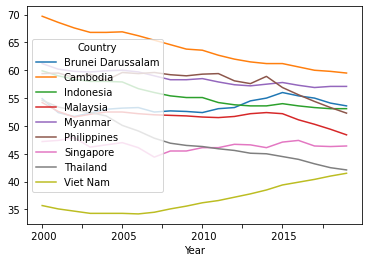

In [24]:
df = df.pivot(index='Year', columns='Country', values='bsVal')

df.plot()

In [25]:
df.to_csv(r'E:/#Utem/Sem6/IDS/Project/Data/PrematureData.csv')